### Detecting_Natural_Disaster_From_Scratch

In this Notebook we will build model from scratch to detect natural disaster using VGG16 Model

In [41]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import plot_confusion_matrix
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model

In [42]:
train_data_dir = './data/train'
valid_data_dir = './data/validation'
test_data_dir = './data/test'

In [43]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=10,
        classes=['earthquake','fire','flood'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['earthquake','fire','flood'])   #class_mode='binary') then either 0 or 1
# this is a similar generator, for test data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['earthquake','fire','flood'])   #class_mode='binary') then either 0 or 1

Found 4039 images belonging to 3 classes.
Found 32 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [44]:
# dimensions of our images.
img_width, img_height = 150, 150
nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 40

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape,'input_shape')

(150, 150, 3) input_shape


In [45]:
print(train_generator.class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{'earthquake': 0, 'fire': 1, 'flood': 2}
{0: 'earthquake', 1: 'fire', 2: 'flood'}


In [46]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

403 3


In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [48]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)       

In [49]:
model.fit_generator(generator=train_generator,validation_data=valid_generator,\
                    steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,verbose=1,epochs=2,)

Epoch 1/2
403/403 [==============================] - 59s 146ms/step - loss: 0.6061 - accuracy: 0.6423 - val_loss: 0.4265 - val_accuracy: 0.6667
Epoch 2/2
403/403 [==============================] - 57s 141ms/step - loss: 0.5085 - accuracy: 0.6731 - val_loss: 0.3271 - val_accuracy: 0.6818


In [50]:
model.save_weights('./data/model_weight/classifier_from_scratch.h5') 
model.save('./data/model_weight/classifier_model.h5') 

In [51]:
test_img,test_labels=next(test_generator)
pred=model.predict_generator(test_generator,
steps=1,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
test_labels_indices=np.argmax(test_labels,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
test_labes=[labels[k] for k in test_labels_indices]

1/1 [==============================] - 0s 99ms/step


In [52]:
print(classification_report(test_labes,predictions))

              precision    recall  f1-score   support

  earthquake       0.00      0.00      0.00         3
        fire       1.00      1.00      1.00         3
       flood       0.57      1.00      0.73         4

    accuracy                           0.70        10
   macro avg       0.52      0.67      0.58        10
weighted avg       0.53      0.70      0.59        10



/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
test_labels_indices

array([0, 1, 2, 2, 2, 1, 0, 0, 2, 1])

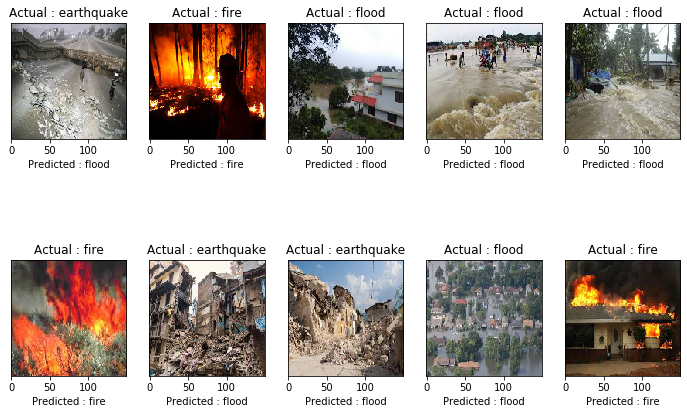

In [54]:
predictions
w=55
h=25
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 2
for i in range(1, columns*rows+1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.yticks([])
    plt.title('Actual : {}'.format(test_labes[i-1]))
    plt.xlabel('Predicted : {}'.format(predictions[i-1]))
    plt.imshow(test_img[i-1])
plt.show()